In [1]:
from keras.datasets import reuters
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results
    
def to_one_hot(labels, dimension=46):
    results=np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label]=1
    return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [31]:
model=models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [33]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [34]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 3s 353us/step - loss: 2.6010 - acc: 0.5555 - val_loss: 1.8107 - val_acc: 0.6520
Epoch 2/10
7982/7982 [==============================] - 2s 199us/step - loss: 1.4798 - acc: 0.7185 - val_loss: 1.3451 - val_acc: 0.7220
Epoch 3/10
7982/7982 [==============================] - 2s 200us/step - loss: 1.0695 - acc: 0.7878 - val_loss: 1.1329 - val_acc: 0.7650
Epoch 4/10
7982/7982 [==============================] - 2s 196us/step - loss: 0.8284 - acc: 0.8330 - val_loss: 1.0160 - val_acc: 0.7860
Epoch 5/10
7982/7982 [==============================] - 2s 194us/step - loss: 0.6621 - acc: 0.8698 - val_loss: 0.9386 - val_acc: 0.8000
Epoch 6/10
7982/7982 [==============================] - 2s 194us/step - loss: 0.5393 - acc: 0.8913 - val_loss: 0.8825 - val_acc: 0.8230
Epoch 7/10
7982/7982 [==============================] - 2s 194us/step - loss: 0.4475 - acc: 0.9094 - val_loss: 0.8557 - val_acc: 0.8220


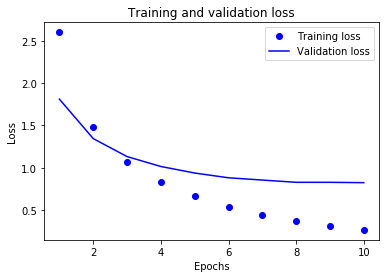

In [35]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

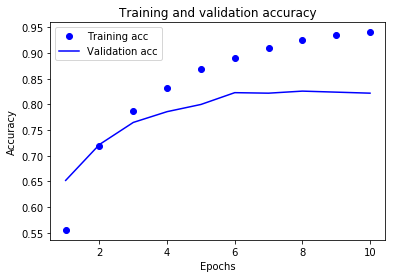

In [36]:
acc=history.history['acc']
val_acc=history.history['val_acc']

epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()